In [508]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib.patches import PathPatch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

pd.set_option('display.max_columns', None)

In [439]:
soccer = pd.read_csv("/Users/tyler/Portfolio/soccer.csv", sep = ";")
soccer = soccer.assign(CL = "No")
soccer = soccer.replace('Kylian MbappĂ©', 'Kylian Mbappé')

In [440]:
soccer_2017 = soccer[soccer['Season'] == '01/01/2017']
soccer_2018 = soccer[soccer['Season'] == '01/01/2018']
soccer_2019 = soccer[soccer['Season'] == '01/01/2019']

In [441]:
CL_2017 = ["Manchester City","Arsenal","Paris S-G","Napoli","Barcelona","Atlético Madrid",
               "Bayern Munich","Monaco","Leverkusen","Dortmund","Real Madrid","Leicester City",
               "Sevilla","Juventus"]
CL_2018 = ["Manchester Utd","Paris S-G","Roma","Barcelona","Liverpool","Manchester City",
           "Tottenham","Bayern Munich","Chelsea","Juventus","Sevilla","Real Madrid"]
CL_2019 = ["Atlético Madrid","Manchester Utd","Tottenham","Lyon","Roma","Liverpool",
           "Manchester City","Juventus","Barcelona","Real Madrid","Bayern Munich","Dortmund"]

In [442]:
soccer_2017.loc[soccer_2017['squad'].isin(CL_2017), 'CL'] = "Yes"
soccer_2018.loc[soccer_2018['squad'].isin(CL_2018), 'CL'] = "Yes"
soccer_2019.loc[soccer_2019['squad'].isin(CL_2019), 'CL'] = "Yes"

In [477]:
CL_2017 = soccer_2017[soccer_2017['CL'] == 'Yes'].drop_duplicates("player")
CL_2017 = CL_2017[['player', 'value', 'squad', 'league']].sort_values('league')

CL_2018 = soccer_2018[soccer_2018['CL'] == 'Yes'].drop_duplicates("player")
CL_2018 = CL_2018[['player', 'value', 'squad', 'league']].sort_values('league')

CL_2019 = soccer_2019[soccer_2019['CL'] == 'Yes'].drop_duplicates("player")
CL_2019 = CL_2019[['player', 'value', 'squad', 'league']].sort_values('league')

In [501]:
value_by_league_2017 = CL_2017[['value','league']].groupby('league', as_index=False).sum().sort_values('league')
value_by_league_2017['value'] = value_by_league_2017['value'].astype(str).str[:-3].astype(np.int64)

value_by_league_2018 = CL_2018[['value','league']].groupby('league', as_index=False).sum().sort_values('league')
value_by_league_2018['value'] = value_by_league_2018['value'].astype(str).str[:-3].astype(np.int64)

value_by_league_2019 = CL_2019[['value','league']].groupby('league', as_index=False).sum().sort_values('league')
value_by_league_2019['value'] = value_by_league_2019['value'].astype(str).str[:-3].astype(np.int64)

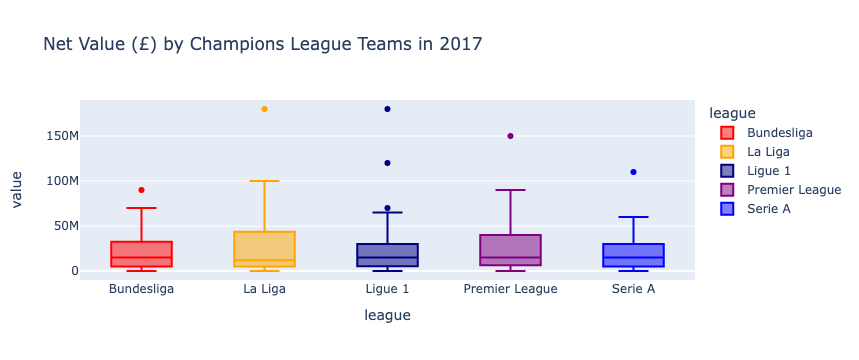

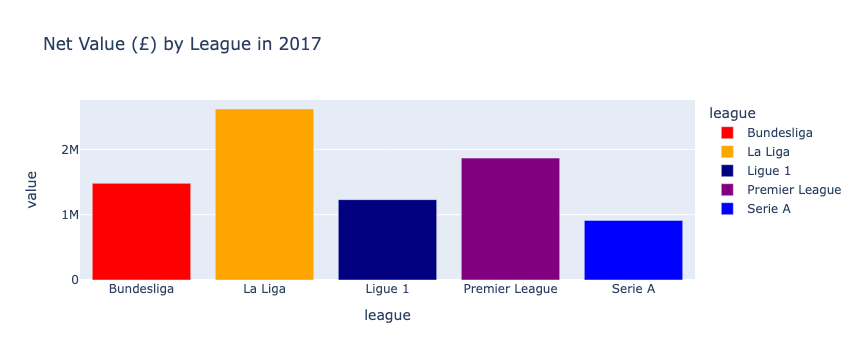

In [543]:
fig = px.box(CL_2017, x="league", y="value", color="league",
             title="Net Value (£) by Champions League Teams in 2017",
            color_discrete_sequence=["red", "orange", "navy", "purple", "blue"])

fig.show()

fig = px.bar(value_by_league_2017, x="league", y="value", color="league",
             title="Net Value (£) by League in 2017",
            color_discrete_sequence=["red", "orange", "navy", "purple", "blue"])

fig.show()

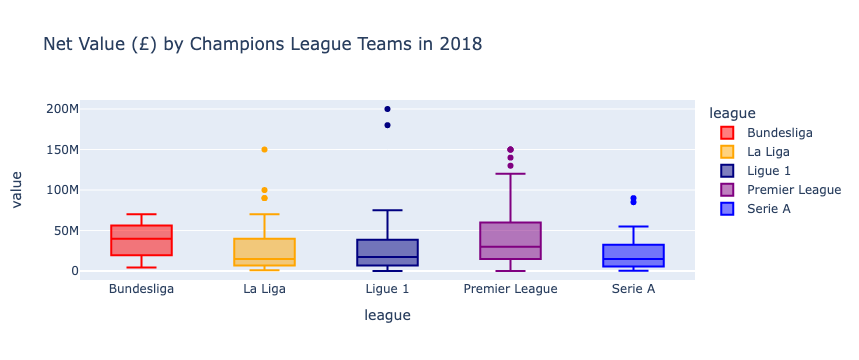

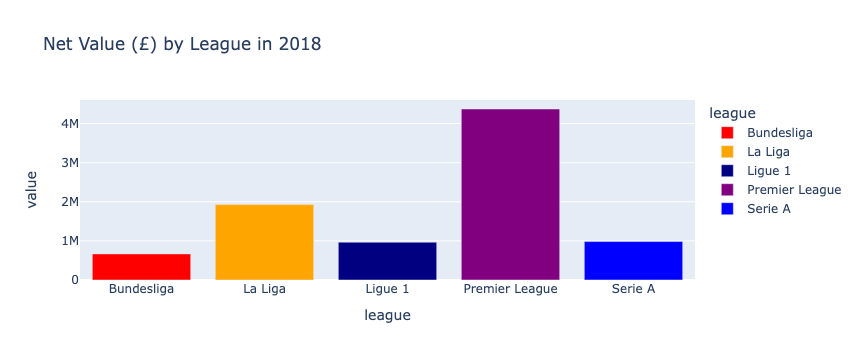

In [544]:
fig = px.box(CL_2018, x="league", y="value", color="league",
             title="Net Value (£) by Champions League Teams in 2018",
            color_discrete_sequence=["red", "orange", "navy", "purple", "blue"])

fig.show()

fig = px.bar(value_by_league_2018, x="league", y="value", color="league",
             title="Net Value (£) by League in 2018",
            color_discrete_sequence=["red", "orange", "navy", "purple", "blue"])

fig.show()

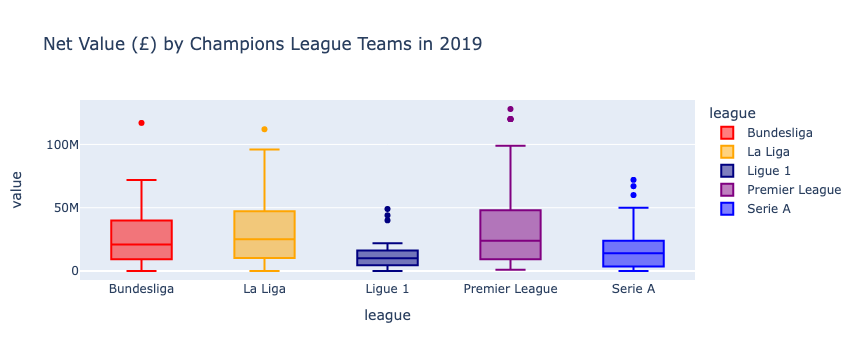

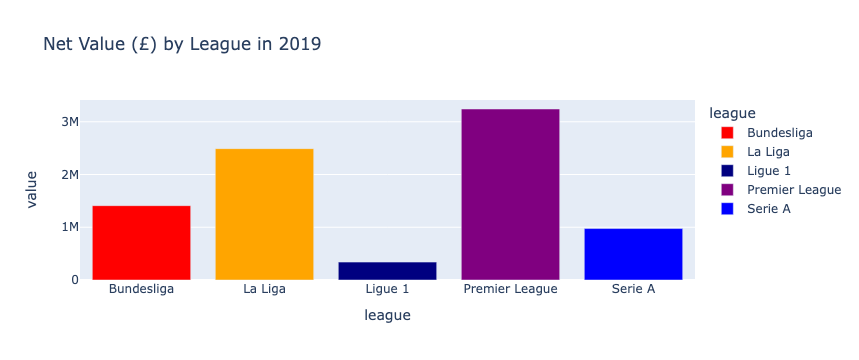

In [542]:
fig = px.box(CL_2019, x="league", y="value", color="league",
             title="Net Value (£) by Champions League Teams in 2019",
            color_discrete_sequence=["red", "orange", "navy", "purple", "blue"])

fig.show()

fig = px.bar(value_by_league_2019, x="league", y="value", color="league",
             title="Net Value (£) by League in 2019",
            color_discrete_sequence=["red", "orange", "navy", "purple", "blue"])

fig.show()

In [435]:
CL_by_league_2017 = CL_2017[['league','squad']]
CL_by_league_2017 = CL_by_league_2017.drop_duplicates("squad").groupby(["league"], as_index=False).size()

CL_by_league_2018 = CL_2018[['league','squad']]
CL_by_league_2018 = CL_by_league_2018.drop_duplicates("squad").groupby(["league"], as_index=False).size()

CL_by_league_2019 = CL_2019[['league','squad']]
CL_by_league_2019 = CL_by_league_2019.drop_duplicates("squad").groupby(["league"], as_index=False).size()

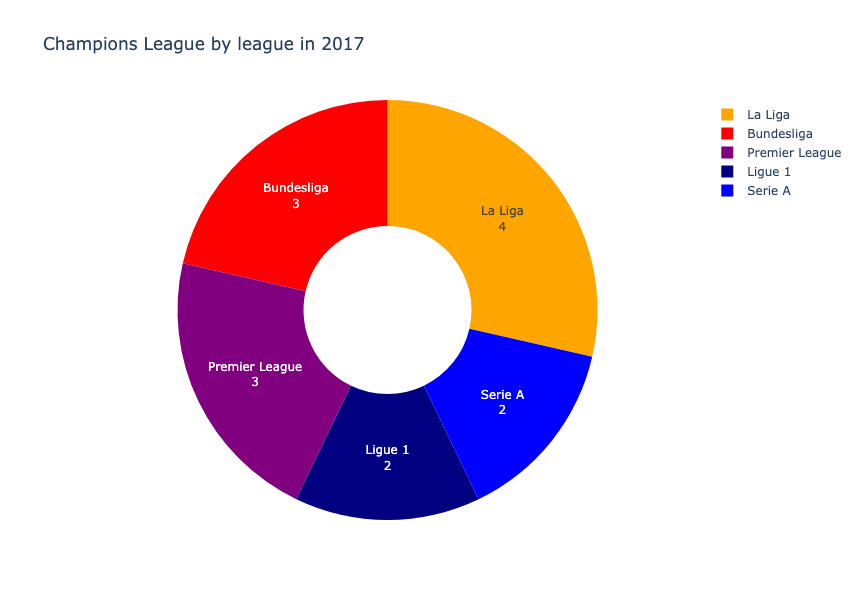

In [533]:
fig = px.pie(CL_by_league_2017, values = "size", names="league",
             title="Champions League by league in 2017",
             color_discrete_sequence=["orange", "red", "purple", "navy", "blue"],
             hole=0.4,
             width=800,
             height=600)
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

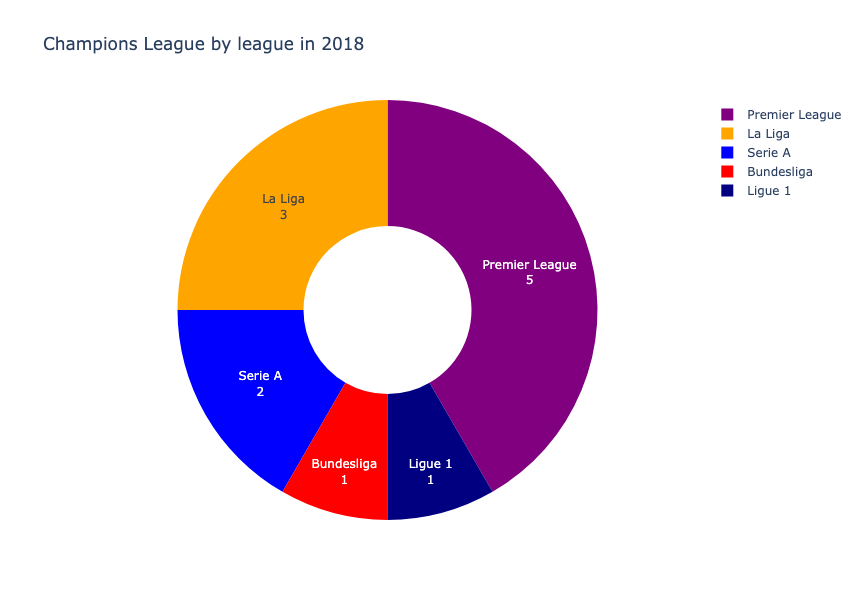

In [537]:
fig = px.pie(CL_by_league_2018, values = "size", names="league",
             title="Champions League by league in 2018",
             color_discrete_sequence=["purple", "orange", "blue", "red", "navy"],
             hole=0.4,
             width=800,
             height=600)
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

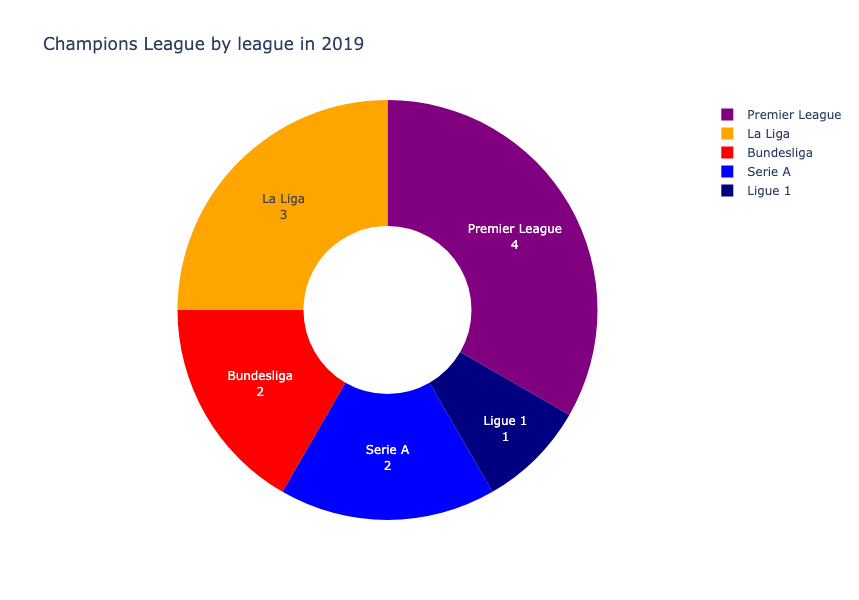

In [539]:
fig = px.pie(CL_by_league_2019, values = "size", names="league",
             color_discrete_sequence=["purple", "orange", "red", "blue", "navy"],
             title="Champions League by league in 2019",
             hole=0.4,
             width=800,
             height=600)
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

In [550]:
fwd_2019 = soccer_2019[soccer_2019['position'] == 'Forward']
fwd_2019.sort_values("player")

,player,age,height,nationality,position,value,games,minutes,goals,assists,crosses,tackles,pressures,blocks,touches,fouls,fouled,offsides,own goals,ball recoveries,saves,squad,Season,league,Attendance,games starts,passes completed,sca,gca,dribbles completed,pens won,goals against gk,shots on target against,CLBestScorer,cards yellow,shots total,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
2546,Aaron Connolly,19,175.0,United Kingdom,Forward,4000000,24,1258,3,1,7,12,234,8,349,16,38,14,0,54,0,Brighton,01/01/2019,Premier League,22369,14,126,25,5,6,2,0,0,No,0,38,15,38,9,14,15,39,54,41,No,No
2543,Aaron Leya Iseka,21,182.0,Belgium,Forward,2000000,22,777,2,0,3,5,137,6,300,20,11,6,0,31,0,Toulouse,01/01/2019,Ligue 1,14200,6,142,20,1,7,1,0,0,NaN,2,25,20,28,3,4,21,22,58,13,No,No
2535,Abdon Prats,26,181.0,Spain,Forward,65000,20,279,0,0,1,2,49,0,114,7,2,0,0,13,0,Mallorca,01/01/2019,La Liga,10877,0,46,2,0,2,0,0,0,No,1,9,19,38,9,6,23,40,65,33,No,No
2532,Abdoul Kader Bamba,25,176.0,France,Forward,1000000,27,1468,1,3,31,28,306,24,960,20,48,3,0,129,0,Nantes,01/01/2019,Ligue 1,24635,16,571,71,6,55,0,0,0,No,5,19,13,28,11,4,13,28,31,37,No,No
2529,Abdul Majeed Waris,27,172.0,Ghana,Forward,2500000,7,371,2,1,4,9,49,3,157,8,20,1,0,21,0,Strasbourg,01/01/2019,Ligue 1,24985,4,65,6,2,9,0,0,0,NaN,1,7,10,27,11,5,11,32,32,38,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,Álvaro Morata,26,187.0,Spain,Forward,36000000,34,2098,12,2,15,19,328,17,850,54,59,37,0,109,0,Atlético Madrid,01/01/2019,La Liga,42236,25,335,55,5,19,1,0,0,No,6,64,3,38,18,16,4,51,27,70,Yes,No
2554,Álvaro Vadillo,24,180.0,Spain,Forward,2000000,22,1218,3,1,34,12,159,17,590,9,20,9,0,59,0,Granada,01/01/2019,La Liga,11174,15,303,39,2,20,0,0,0,No,0,17,7,38,16,8,14,52,45,56,No,No
2552,Ángel Di María,31,180.0,Argentina,Forward,32000000,26,2000,8,14,92,21,410,20,1593,12,22,6,0,142,0,Paris S-G,01/01/2019,Ligue 1,47517,23,940,137,25,72,0,0,0,No,2,73,1,27,22,2,3,75,24,68,No,No
2550,Ángel Rodríguez,32,171.0,Spain,Forward,6000000,32,1407,10,3,19,15,301,11,555,52,26,29,0,73,0,Getafe,01/01/2019,La Liga,8000,9,197,35,6,15,0,0,0,No,6,49,8,38,14,12,12,43,37,54,No,No


In [ ]:
# soccer_ply = soccer[soccer.groupby('player')['player'].transform('size').gt(2)]

In [411]:
fwd_2019 = soccer_2019[soccer_2019['position'] == 'Forward'].drop_duplicates("player")
mid_2019 = soccer_2019[soccer_2019['position'] == 'Midfield'].drop_duplicates("player")
def_2019 = soccer_2019[soccer_2019['position'] == 'Defender'].drop_duplicates("player")
gk_2019 = soccer_2019[soccer_2019['position'] == 'Goalkeeper'].drop_duplicates("player")

fwd_2019 = fwd_2019[["player","value","goals","assists","crosses","fouled",
                         "offsides","passes completed","dribbles completed"]]
mid_2019 = mid_2019[["player","value","goals","assists","crosses","pressures",
                        "passes completed","dribbles completed"]]
def_2019 = def_2019[["player","assists","crosses","tackles","pressures",
                        "fouls","ball recoveries","cards yellow"]]
gk_2019 = gk_2019[["player","value","age","goals against gk"]]

In [412]:
fwd_2019.sort_values("player")

,player,value,goals,assists,crosses,fouled,offsides,passes completed,dribbles completed
2546,Aaron Connolly,4000000,3,1,7,38,14,126,6
2543,Aaron Leya Iseka,2000000,2,0,3,11,6,142,7
2535,Abdon Prats,65000,0,0,1,2,0,46,2
2532,Abdoul Kader Bamba,1000000,1,3,31,48,3,571,55
2529,Abdul Majeed Waris,2500000,2,1,4,20,1,65,9
...,...,...,...,...,...,...,...,...,...
2558,Álvaro Morata,36000000,12,2,15,59,37,335,19
2554,Álvaro Vadillo,2000000,3,1,34,20,9,303,20
2552,Ángel Di María,32000000,8,14,92,22,6,940,72
2550,Ángel Rodríguez,6000000,10,3,19,26,29,197,15


In [ ]:
fig = px.bar(fwd_2019, x="player", y="goals", color="cuisine_type", 
             title="Average rating by cuisine type",color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_layout(xaxis=dict(type="category"))
fig.update_yaxes(range=[3, 5])
fig.show()

<AxesSubplot:>

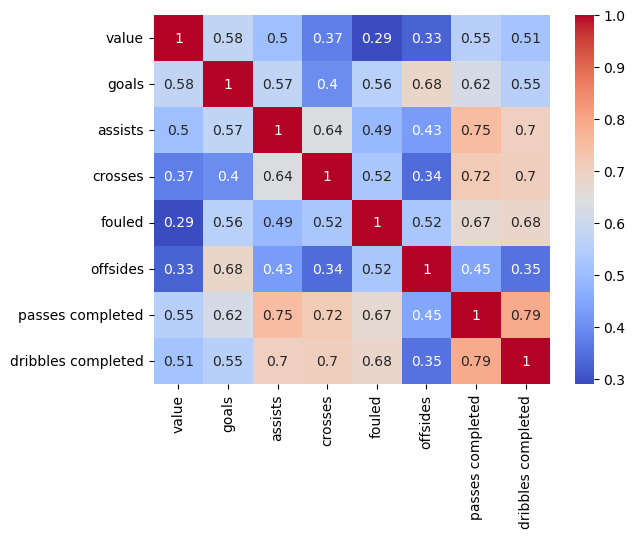

In [403]:
corr_fwd = fwd_2019.corr()
sns.heatmap(corr_fwd, cmap="coolwarm", annot=True)

<AxesSubplot:>

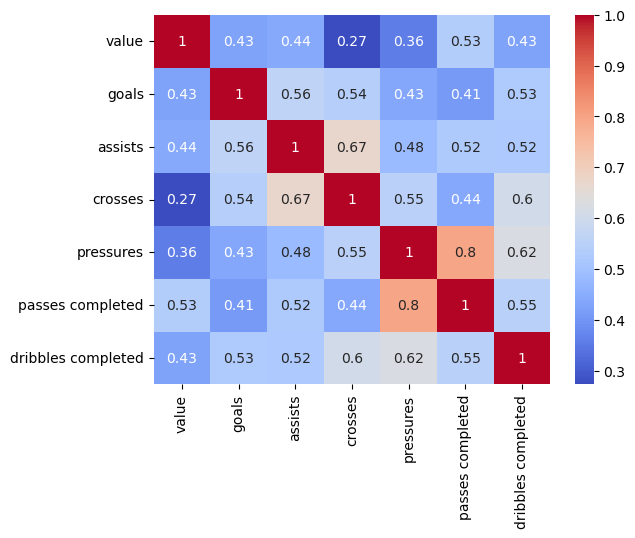

In [404]:
corr_mid = mid_2019.corr()
sns.heatmap(corr_mid, cmap="coolwarm", annot=True)

<AxesSubplot:>

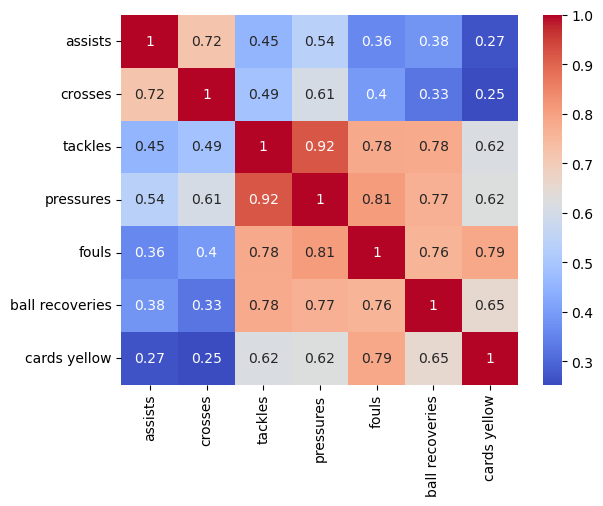

In [405]:
corr_def = def_2019.corr()
sns.heatmap(corr_def, cmap="coolwarm", annot=True)

<AxesSubplot:>

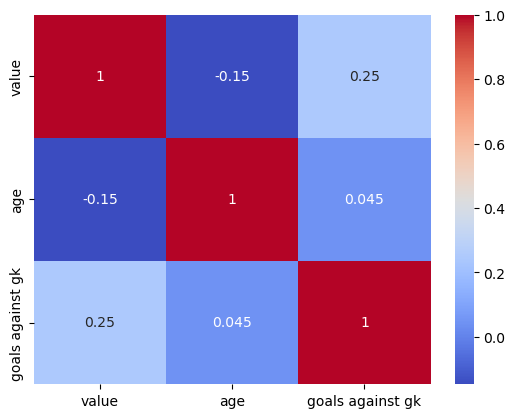

In [408]:
corr_gk = gk_2019.corr()
sns.heatmap(corr_gk, cmap="coolwarm", annot=True)